<a href="https://colab.research.google.com/github/mleyvaz/vision_computadora/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Técnicas embedding para clasificación de imágenes

Los modelos de aprendizaje profundo se utilizan para calcular un vector de características para cada imagen. Devuelve una tabla de datos mejorada con columnas adicionales (descriptores de imagen).

In [4]:
!pip install -U image_embeddings # don't run this line if running this directly in the repo

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 7.0MB 6.4MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for image-embeddings: filename=image_embeddings-1.4.0-cp36-none-any.whl size=13140 sha256=10cdf2540f67668315515568aa81b660ad6079d587952a5dd64ab5b0f15b8387
  Stored in directory: /root/.cache/pip/wheels/ed/4b/03/d57a2985ed7c15388608e4d73fc2e70a15b65b1a5518af5a61
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=b828019cccf169f8acd94a67cc939291db37d4bd432f0f006a29fdd2d31fcb65
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built image-embeddings fire


In [5]:
import image_embeddings

In [1]:
# Let's define some paths where to save images, tfrecords and embeddings
from pathlib import Path
home = str(Path.home())
dataset = "tf_flowers"
path_images = f"{home}/{dataset}/images"
path_tfrecords = f"{home}/{dataset}/tfrecords"
path_embeddings = f"{home}/{dataset}/embeddings"

In [6]:
image_embeddings.downloader.save_examples_to_folder(output_folder=path_images, images_count=1000, dataset=dataset)
image_embeddings.inference.write_tfrecord(image_folder=path_images,
                                          output_folder=path_tfrecords,
                                          num_shards=10)

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: tf_flowers/3.0.1
INFO:absl:Load dataset info from /tmp/tmphgd5z72jtfds
INFO:absl:Generating dataset tf_flowers (/root/tensorflow_datasets/tf_flowers/3.0.1)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



INFO:absl:Load dataset info from /root/tensorflow_datasets/tf_flowers/3.0.1.incomplete4RJQID
INFO:absl:Constructing tf.data.Dataset for split train, from /root/tensorflow_datasets/tf_flowers/3.0.1




Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Shard 0 saved after 0s
Shard 1 saved after 0s
Shard 2 saved after 0s
Shard 3 saved after 0s
Shard 4 saved after 1s
Shard 5 saved after 1s
Shard 6 saved after 1s
Shard 7 saved after 1s
Shard 8 saved after 1s
Shard 9 saved after 1s


In [8]:
image_embeddings.inference.write_tfrecord(image_folder=path_images,
                                          output_folder=path_tfrecords,
                                          num_shards=10)

Shard 0 saved after 0s
Shard 1 saved after 0s
Shard 2 saved after 0s
Shard 3 saved after 0s
Shard 4 saved after 0s
Shard 5 saved after 1s
Shard 6 saved after 1s
Shard 7 saved after 1s
Shard 8 saved after 1s
Shard 9 saved after 1s


In [10]:
image_embeddings.inference.run_inference(tfrecords_folder=path_tfrecords,
                                         output_folder=path_embeddings,
                                         batch_size=1000)

1/1 [==============================] - 7s 7s/step

Shard 0 done after 6s
Shard 0 saved after 7s
1/1 [==============================] - 6s 6s/step

Shard 1 done after 12s
Shard 1 saved after 12s
1/1 [==============================] - 6s 6s/step

Shard 2 done after 18s
Shard 2 saved after 18s
1/1 [==============================] - 6s 6s/step

Shard 3 done after 24s
Shard 3 saved after 24s
1/1 [==============================] - 6s 6s/step

Shard 4 done after 30s
Shard 4 saved after 30s
1/1 [==============================] - 6s 6s/step

Shard 5 done after 35s
Shard 5 saved after 35s
1/1 [==============================] - 6s 6s/step

Shard 6 done after 41s
Shard 6 saved after 41s
1/1 [==============================] - 6s 6s/step

Shard 7 done after 47s
Shard 7 saved after 47s
1/1 [==============================] - 6s 6s/step

Shard 8 done after 53s
Shard 8 saved after 53s
1/1 [==============================] - 6s 6s/step

Shard 9 done after 58s
Shard 9 saved after 59s


In [11]:
[id_to_name, name_to_id, embeddings] = image_embeddings.knn.read_embeddings(path_embeddings)
index = image_embeddings.knn.build_index(embeddings)

Buscar las más cercana

image_dandelion_443


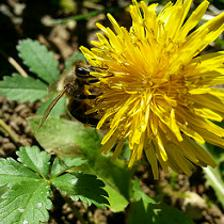

In [13]:
p=225
print(id_to_name[p])
image_embeddings.knn.display_picture(path_images, id_to_name[p])
results = image_embeddings.knn.search(index, id_to_name, embeddings[p])
image_embeddings.knn.display_results(path_images, results)